In [13]:
import pandas as pd
import numpy as np
import os
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import cv2
%matplotlib inline

**Get the pictures in**

In [14]:
categories = ["dogs","alldogs"]
test_folder=r'C:/Users/emill/PycharmProjects/NN_from_scratch/imgs'

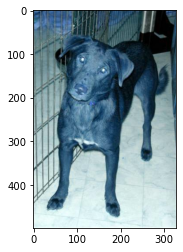

In [15]:
for category in categories:
    path = os.path.join(test_folder, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_ANYCOLOR)
        plt.imshow(img_array)
        plt.show()
        break
    break

**Resize to 64x64**

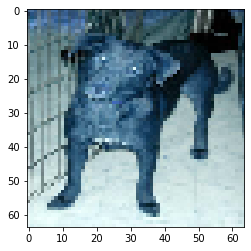

In [16]:
img_size=64
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(new_array)

**Get the training data**

In [17]:
training_data = []
def create_training_data():
    for category in categories:
        path = os.path.join(test_folder, category)
        class_num=categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_ANYCOLOR)
                new_array = cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

**Shuffle the training data**

In [18]:
import random
random.shuffle(training_data)

In [19]:
X = []
y = []

In [20]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
Xnew=np.array(X).reshape(-1,img_size,img_size,3)

In [21]:
Xnew=np.array(X).reshape(-1,img_size,img_size,3)
longvector = Xnew.reshape(Xnew.shape[0],-1).T
longvector.shape
train_x = longvector / 255

In [22]:
train_y=np.array([y])

In [44]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(1)
    

    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y,1))

    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters    

In [45]:
def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):

        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

In [46]:
# GRADED FUNCTION: linear_forward

def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    Z = np.dot(W,A) + b
    ### END CODE HERE ###
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [47]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python tuple containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    
    if activation == "sigmoid":

        Z, linear_cache = linear_forward(A_prev,W,b)
        A = 1/(1+np.exp(-Z))
        activation_cache = Z
        
        ### END CODE HERE ###
    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev,W,b)
        A = np.maximum(0,Z)
        activation_cache = Z

    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [48]:
def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """
    
    caches = []
    A = X
    L = len(parameters) // 2

    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W'+ str(l)], parameters["b" + str(l)], 'relu')
        caches.append(cache)
        
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)],parameters["b" + str(L)] , 'sigmoid')
    caches.append(cache)

    
    assert(AL.shape == (1,X.shape[1]))
    
    return AL, caches

In [49]:
def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    cost = - 1/m * np.sum(Y * np.log(AL) + (1-Y) * np.log(1-AL))

    
    cost = np.squeeze(cost)      
    assert(cost.shape == ())
    
    return cost

In [50]:
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1 / m * np.dot(dZ, A_prev.T)
    db = 1 / m * np.sum(dZ,axis=1,keepdims=True)
    dA_prev = np.dot(W.T,dZ)

    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [51]:
def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = np.array(dA, copy = True)
        dZ[activation_cache <= 0] = 0
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

    elif activation == "sigmoid":
        sig = 1 / (1 + np.exp(-activation_cache))
        dZ = dA * sig * (1 - sig)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

In [52]:
def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [53]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
    return parameters

In [54]:
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [55]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.01, num_iterations = 4000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        A1, cache1 = linear_activation_forward(X, W1, b1, activation='relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation='sigmoid')
        # Compute cost
        cost = compute_cost(A2, Y)
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation='sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation='relu')
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
        
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    return parameters


Cost after iteration 0: 0.692411691882913
Cost after iteration 100: 0.5991784272536477
Cost after iteration 200: 0.5588582357458906
Cost after iteration 300: 0.5464021537257492
Cost after iteration 400: 0.5402340972988515
Cost after iteration 500: 0.5346834926315204
Cost after iteration 600: 0.5293396317693584
Cost after iteration 700: 0.5236463644980298
Cost after iteration 800: 0.5168906114812457
Cost after iteration 900: 0.5095215192789059
Cost after iteration 1000: 0.5023827531661968
Cost after iteration 1100: 0.49649273016479023
Cost after iteration 1200: 0.49127341093487487
Cost after iteration 1300: 0.4855739496978987
Cost after iteration 1400: 0.48180937326993545
Cost after iteration 1500: 0.47655079241398723
Cost after iteration 1600: 0.47215489587881543
Cost after iteration 1700: 0.4690870953372826
Cost after iteration 1800: 0.46509296123188754
Cost after iteration 1900: 0.4606277481172171
Cost after iteration 2000: 0.45724050831583163
Cost after iteration 2100: 0.45248447812

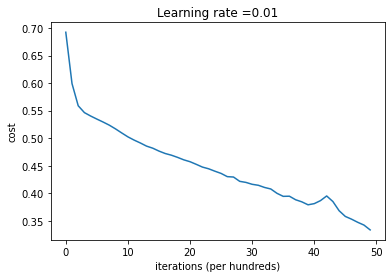

In [56]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 5000, print_cost=True)

In [82]:
foldername = ["testhats"]  # folder name(s) where your pics are
test_folder=r'C:/Users/emill/PycharmProjects/NN_from_scratch/imgs'  #path

In [83]:
def predict(model):
    for i in range(200):
        for category in foldername:
            path = os.path.join(test_folder, category)
            counter=0
            for img in os.listdir(path):
                counter+=1
                if counter == i:
                    img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_ANYCOLOR)
                    plt.imshow(img_array)
                    img_size=64
                    new_array = cv2.resize(img_array, (img_size,img_size))
                    new_array=np.array(new_array).reshape(-1,img_size,img_size,3)
                    
                    if model=="kerasmodel"
                    prediction=happyModel.predict(new_array)
                    plt.title(prediction)
                    plt.show()
                    
                    else:
                    
                        longvector = new_array.reshape(new_array.shape[0],-1).T
                        longvector.shape
                        train_x = longvector / 255
                        W1 = parameters["W1"]
                        b1 = parameters["b1"]
                        W2 = parameters["W2"]
                        b2 = parameters["b2"]
                        A1, cache1 = linear_activation_forward(train_x, W1, b1, activation='relu')
                        A2, cache2 = linear_activation_forward(A1, W2, b2, activation='sigmoid')
                        
                        # A2 is the probability of "dog has a hat" (activation of the last sigmoid)
                        verdict=""
                        if A2 > 0.4:
                            verdict="hat"
                        else:
                            verdict="no hat"
                        plt.title(verdict,A2)
                        plt.show()


    print(hatscorrect)
    
# numpymodel,kerasmodel

1.0
1.0
0.99995637
1.0
0.99026704
0.98786366
0.9923413
0.16142336
0.9999883
0.75968313
0.99983704
0.99999976
0.99962425
0.999949
0.9194378
0.9973058
0.9969152
1.0
0.9494776
0.95941305
0.9996701
0.94727623
0.97412
0.9990022
0.9999969
0.99886805
0.9999979
0.98867387
0.9999994
0.99962425
0.99614763
0.9998424
0.9999982
0.98720396
0.9933815
0.99870384
0.8772676
0.99972725
0.9999963
1.0
0.9950486
0.9956363
0.9999446
0.99998754
0.9999974
0.9930339
0.99999857
0.9793666
0.99891424
0.999996
0.99962616
0.9999939
0.28846574
0.9999436
0.99995196
0.99997747
0.999691
0.98867035
0.9999747
0.9995155
1.0
0.9999996
0.96879613
0.99990845
1.0
1.0
0.99918747
0.9939863
0.9999931
0.42588142
1.0
1.0
0.9995886
0.9995473
1.0
1.0
0.99929196
0.9996865
0.9072243
1.0
0.9919724
0.0063256025
0.9999877
0.99993455
0.55155814
0.9988477
0.99859375
0.96652055
0.999998
0.99729294
0.99934185
1.0
1.9964732e-06
1.0
0.999998
0.9998325
0.9999883
0.99999774
0.99934995
0.95938283
0.9997668
0.99995494
0.99110615
0.99997854
0.999788

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001C8977C3940> (for post_execute):


KeyboardInterrupt: 

In [11]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
#import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model


import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

In [23]:
def HappyModel(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset
        (height, width, channels) as a tuple.  
        Note that this does not include the 'batch' as a dimension.
        If you have a batch like 'X_train', 
        then you can provide the input_shape using
        X_train.shape[1:]


    Returns:
    model -- a Model() instance in Keras
    """
    
    ### START CODE HERE ###

    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='HappyModel')

    
    
    ### END CODE HERE ###
    
    return model

In [41]:
newy=train_y.T
newy.shape

(5379, 1)

In [33]:
happyModel = HappyModel(Xnew.shape[1:])

In [34]:
import keras
opt = keras.optimizers.Adam()
happyModel.compile(loss='binary_crossentropy', optimizer=opt,metrics = ["accuracy"])

In [43]:
happyModel.fit(Xnew, newy, batch_size=16,epochs=20)

Epoch 1/20
337/337 [==============================] - 23s 67ms/step - loss: 1.1472 - accuracy: 0.7614
Epoch 2/20
337/337 [==============================] - 27s 80ms/step - loss: 0.5971 - accuracy: 0.8478
Epoch 3/20
337/337 [==============================] - 22s 66ms/step - loss: 0.5022 - accuracy: 0.8580
Epoch 4/20
337/337 [==============================] - 22s 64ms/step - loss: 0.3954 - accuracy: 0.8869
Epoch 5/20
337/337 [==============================] - 24s 72ms/step - loss: 0.3382 - accuracy: 0.8964
Epoch 6/20
337/337 [==============================] - 24s 72ms/step - loss: 0.2669 - accuracy: 0.9154
Epoch 7/20
337/337 [==============================] - 25s 74ms/step - loss: 0.1919 - accuracy: 0.9331
Epoch 8/20
337/337 [==============================] - 25s 73ms/step - loss: 0.1674 - accuracy: 0.9424
Epoch 9/20
337/337 [==============================] - 24s 71ms/step - loss: 0.0961 - accuracy: 0.9663
Epoch 10/20
337/337 [==============================] - 25s 74ms/step - loss: 0.135